In [1]:
# World Happyness report analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import preprocessing as prep

In [2]:
data19 = pd.read_csv("2019.csv")
data18 = pd.read_csv("2018.csv")
data17 = pd.read_csv("2017.csv")
data16 = pd.read_csv("2016.csv")
data15 = pd.read_csv("2015.csv")

Country                      0
Region                       0
Happiness Rank               0
Happiness Score              0
Standard Error               0
GDP per Capita               0
Family                       0
Life expectancy              0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
Dystopia Residual            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
Country                      158 non-null object
Happiness Score              158 non-null float64
GDP per Capita               158 non-null float64
Life expectancy              158 non-null float64
Freedom                      158 non-null float64
Generosity                   158 non-null float64
Perceptions of corruption    158 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB
None
-------------------- Year: 2015 -------------------------


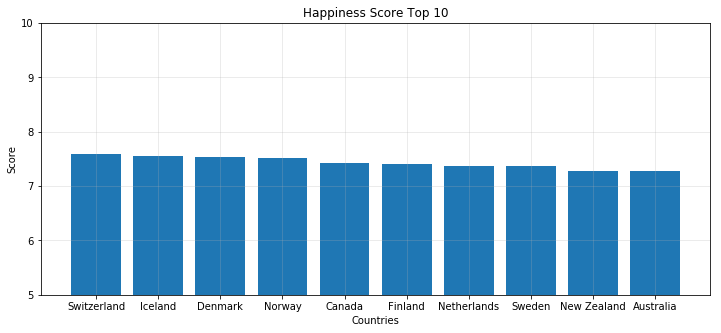

Country                      0
Region                       0
Happiness Rank               0
Happiness Score              0
Lower Confidence Interval    0
Upper Confidence Interval    0
GDP per Capita               0
Family                       0
Life expectancy              0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
Dystopia Residual            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
Country                      157 non-null object
Happiness Score              157 non-null float64
GDP per Capita               157 non-null float64
Life expectancy              157 non-null float64
Freedom                      157 non-null float64
Generosity                   157 non-null float64
Perceptions of corruption    157 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB
None
-------------------- Year: 2016 -------------------------


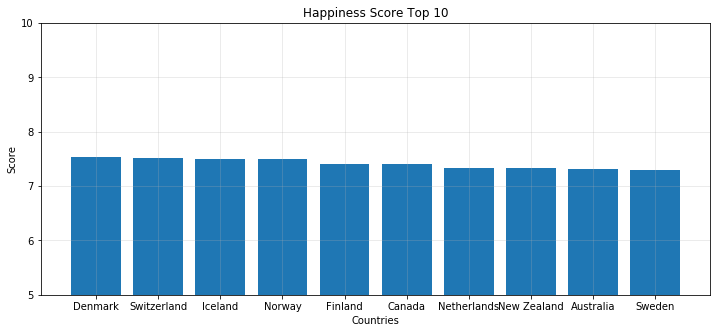

Country                      0
Happiness.Rank               0
Happiness Score              0
Whisker.high                 0
Whisker.low                  0
GDP per Capita               0
Family                       0
Life expectancy              0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
Dystopia.Residual            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
Country                      155 non-null object
Happiness Score              155 non-null float64
GDP per Capita               155 non-null float64
Life expectancy              155 non-null float64
Freedom                      155 non-null float64
Generosity                   155 non-null float64
Perceptions of corruption    155 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.6+ KB
None
-------------------- Year: 2017 -------------------------


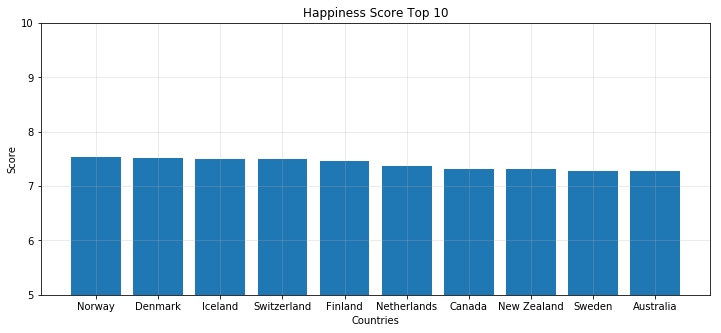

Overall rank                 0
Country                      0
Happiness Score              0
GDP per Capita               0
Social support               0
Life expectancy              0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Country                      156 non-null object
Happiness Score              156 non-null float64
GDP per Capita               156 non-null float64
Life expectancy              156 non-null float64
Freedom                      156 non-null float64
Generosity                   156 non-null float64
Perceptions of corruption    156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.6+ KB
None
-------------------- Year: 2018 -------------------------


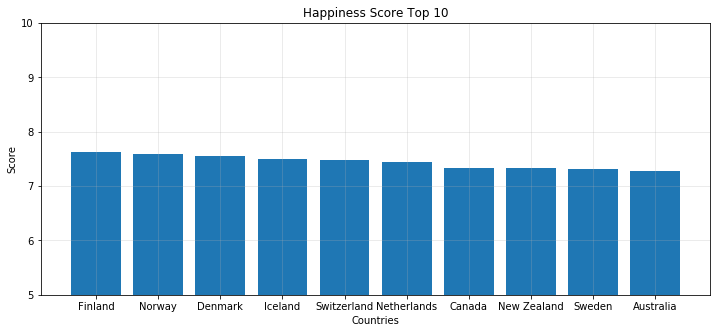

Overall rank                 0
Country                      0
Happiness Score              0
GDP per Capita               0
Social support               0
Life expectancy              0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Country                      156 non-null object
Happiness Score              156 non-null float64
GDP per Capita               156 non-null float64
Life expectancy              156 non-null float64
Freedom                      156 non-null float64
Generosity                   156 non-null float64
Perceptions of corruption    156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.6+ KB
None
-------------------- Year: 2019 -------------------------


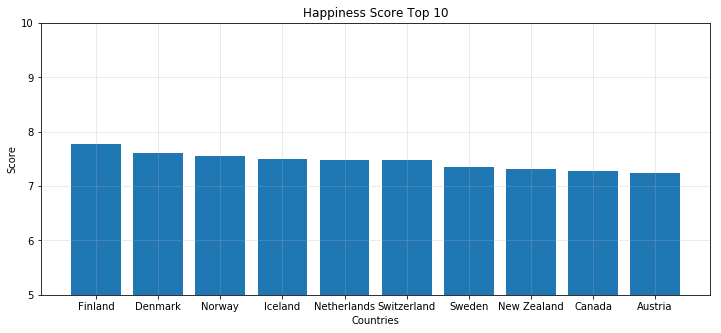

In [5]:
# Top 10 Happiest countries (yearwise)

data = [data15, data16, data17, data18, data19]


def filter_columns(df):
    df = df.filter(['Country','Happiness Score','GDP per Capita','Life expectancy','Freedom'or'Freedom to make life choices','Generosity','Perceptions of corruption'])
    return df    

year = 2015 # to label yearwise plots
for i in range(len(data)):
    print(data[i].isna().sum())
    plt.figure(figsize=(12,5))
    plt.grid(alpha=0.3)
    data[i] = filter_columns(data[i])
    print(data[i].info())
    x = data[i]['Country'].values[0:10]
    y = data[i]['Happiness Score'].values[0:10]
    plt.ylim(5,10)
    plt.bar(x,y)
    
    print('-------------------- Year:',year,'-------------------------')
    plt.title('Happiness Score Top 10')
    plt.xlabel('Countries')
    plt.ylabel('Score')
    plt.show()
    year = year + 1
    

       Country  Happiness Score  Prediction
0      Finland            7.769    6.828936
1      Denmark            7.600    6.937342
2       Norway            7.554    7.104079
3      Iceland            7.494    6.873845
4  Netherlands            7.488    6.862302

 Mean Absolute Percentage Error:  8.783727427898253

 Mean Squared Error:  0.3129589236366703

 R squared error:  0.7457878112065419


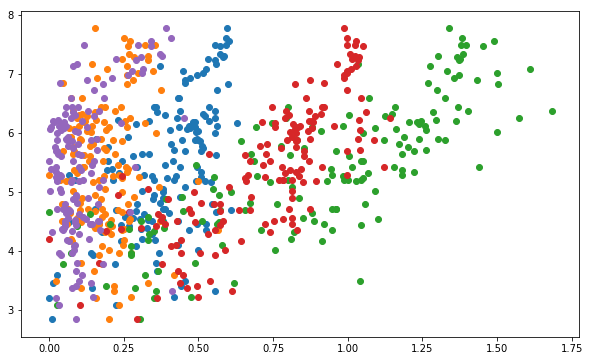

In [7]:
# Model training 
# To predict Happiness scores for the year 2019
linear_reg = LinearRegression()    
for df in data:
    model_df = df.drop(['Happiness Score','Country'], axis = 1)
    train_x, train_y = model_df, df.loc[:, ('Happiness Score')]
    #linear_reg.fit(train_x, train_y)

atrain_x = train_x.to_numpy()
atrain_y = train_y.to_numpy()

test_y = data[4]['Happiness Score']
test_x = data[4].drop(['Happiness Score','Country'], axis = 1)
linear_reg.fit(atrain_x, atrain_y)
pred_y = linear_reg.predict(test_x)

acc_list = [] 
mse_list = []
for i in range(len(test_y)):
    prsnt = abs((test_y[i] - pred_y[i])/test_y[i])
    prsnt1 = (test_y[i] - pred_y[i])**2
    acc_list.append(prsnt)
    mse_list.append(prsnt1)

pred_y = pd.DataFrame(pred_y)
pred_y = pred_y.rename(columns={0:'Prediction'})
print(data19.filter(['Country','Happiness Score']).merge(pred_y, left_index = True, right_index = True ).head(5))

mse_score = (sum(mse_list))/156
mae_score = (sum(acc_list))/156
print('\n Mean Absolute Percentage Error: ', mae_score*100)
print('\n Mean Squared Error: ', mse_score)
print('\n R squared error: ', r2_score(test_y, pred_y))

plt.figure(figsize=(10,6))
plt.scatter(test_x['Freedom'],test_y)
plt.scatter(test_x['Generosity'],test_y)
plt.scatter(test_x['GDP per Capita'],test_y)
plt.scatter(test_x['Life expectancy'],test_y)
plt.scatter(test_x['Perceptions of corruption'],test_y)

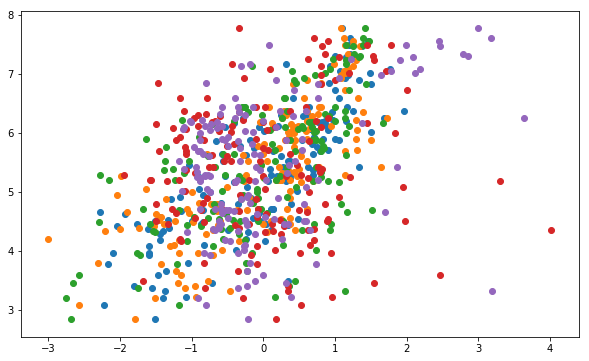

In [9]:
# Feature scaling to applied here...
plt.figure(figsize=(10,6))
sc = prep.StandardScaler()
x_scaler = sc.fit_transform(atrain_x)
x_scaler = pd.DataFrame(x_scaler)
atrain_y = np.reshape(atrain_y,(-1, 1))
y_scaler = sc.fit_transform(atrain_y)


linear_reg.fit(x_scaler, y_scaler.flatten())
spred_y = linear_reg.predict(x_scaler)


spred_y = np.reshape(spred_y, (-1,1))
spred_y = sc.fit_transform(spred_y)
for i in range(len(x_scaler)):
    column = []
    for j in range(len(x_scaler)):
        column.append(x_scaler[i][j])
    plt.scatter(column, test_y)
    if (i == 4): break

In [13]:
acc_list = [] 
mse_list = []
for i in range(len(spred_y)):
    prsnt = abs(y_scaler[i] - spred_y[i])/abs(y_scaler[i])
    prsnt1 = (y_scaler[i] - spred_y[i])**2
    acc_list.append(prsnt)
    mse_list.append(prsnt1)
    
n = 156 

mse_score = (sum(mse_list))/n
mae_score = (sum(acc_list))/n
print('\n Mean Absolute Percentage Error: ', mae_score*100)
print('\n Mean Squared Error: ', mse_score)
print('\n R squared error: ', r2_score(y_scaler, spred_y))

coeff = linear_reg.coef_

print('intercept', linear_reg.intercept_)
print('coeff.', coeff)
#plt.plot(x_scaler,np.polyval([coeff, linear_reg.intercept_],x_scaler))
c = linear_reg.intercept_


 Mean Absolute Percentage Error:  [159.96493575]

 Mean Squared Error:  [0.27281986]

 R squared error:  0.7271801425520639
intercept 3.1965995705247404e-16
coeff. [0.42601624 0.31320264 0.25463617 0.03657153 0.04209765]
